# Data preprocessing

## I. Imports & functions

In [93]:
# required imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import skfda
from typing import Tuple
from scipy import stats

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [94]:
# reading data
data = pd.read_csv('data/data_original.csv')

## II. Imputation

### II.I CO2 emission - best imputation

MSE for fill NA with last known value: 0.046
MSE for fill NA with KNN Imputer: 4.668
MSE for fill NA with spline method: 2.413


<AxesSubplot:title={'center':'co2_emission'}>

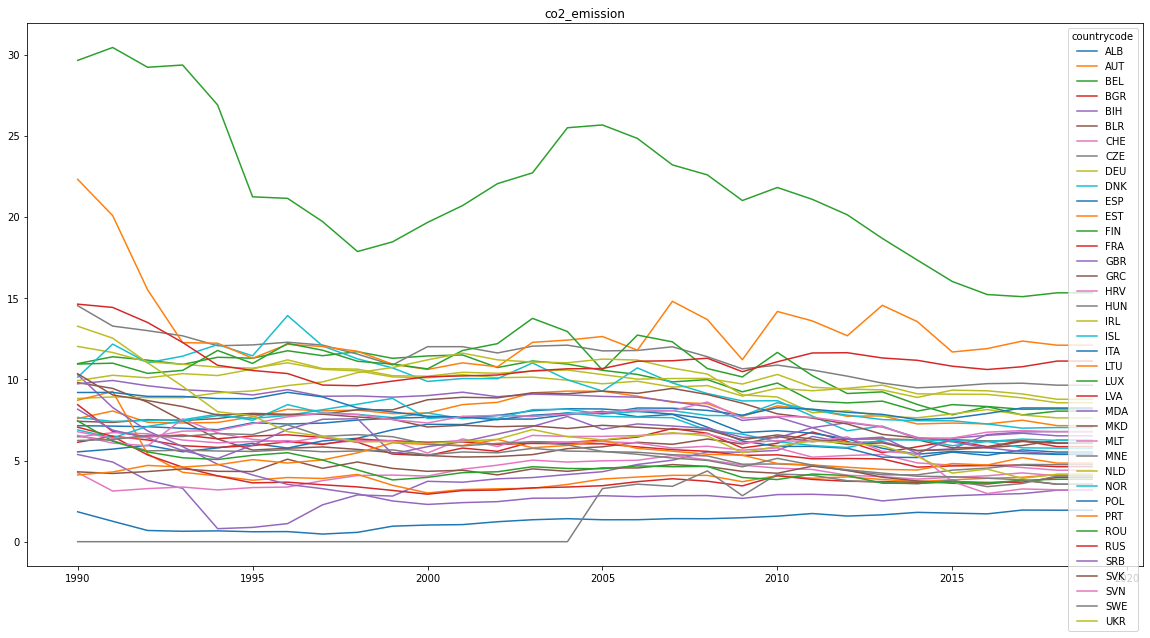

In [95]:
# Testing different imputation options for CO2 emission. As CO2 emission has missing values only in one year point,
# we are testing imputation methods removing one year (2018) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_co2 = data[['year','co2_emission']].copy()

# Testing pad option
data_copy.loc[data_copy.year == 2018, 'co2_emission'] = np.NaN
data_copy['co2_emission'].fillna(method = 'pad', inplace = True)
mse = mean_squared_error(data_copy[data_copy.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
print("MSE for fill NA with last known value: {:.3f}".format(mse))

# Testing KNN imputer
data_copy.loc[data_copy.year == 2018, 'co2_emission'] = np.NaN
data_copy.co2_emission = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 13])
mse = mean_squared_error(data_copy[data_copy.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
print("MSE for fill NA with KNN Imputer: {:.3f}".format(mse))

# Testing spline option
data_copy.loc[data_copy.year == 2018, 'co2_emission'] = np.NaN
data_copy.co2_emission.interpolate(method = 'spline',order = 2, inplace = True)
mse = mean_squared_error(data_copy[data_copy.year == 2018].co2_emission, data_co2[data_co2.year == 2018].co2_emission)
print("MSE for fill NA with spline method: {:.3f}".format(mse))

# Using pad option as it has the best results
data['co2_emission'].fillna(method = 'pad', inplace = True)

# Ploting CO2 after imputation
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='co2_emission').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='co2_emission')

### II.II Employment_agro - best imputation

MSE for fill NA with backfill method: 0.479
MSE for fill NA with KNN imputer: 39.750


<AxesSubplot:title={'center':'employment_agro'}>

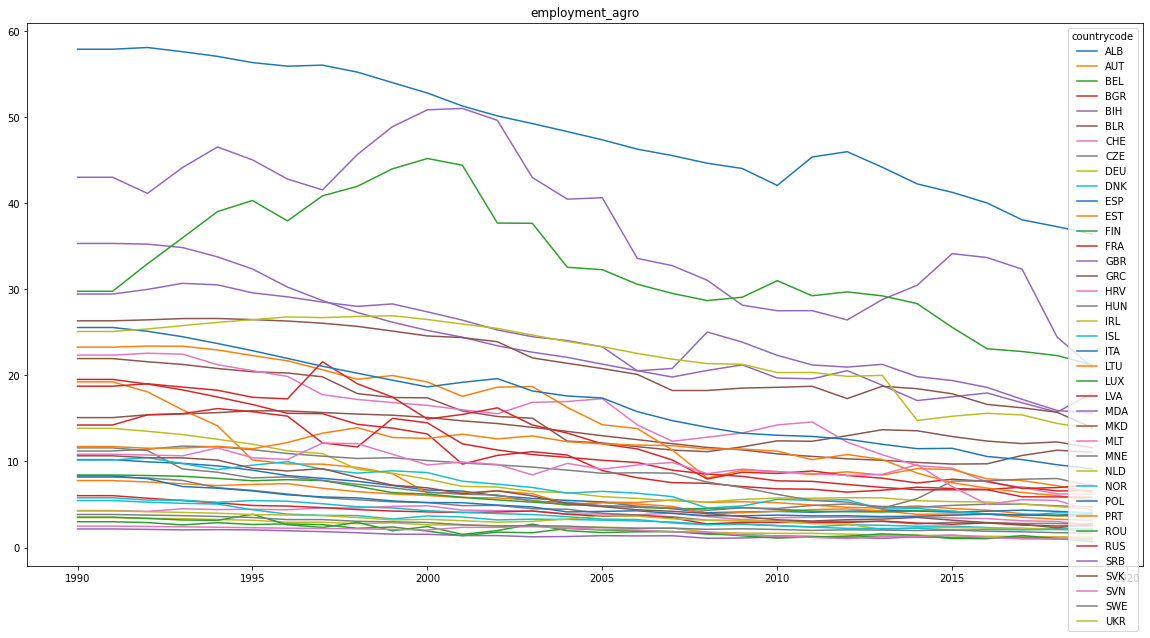

In [96]:
# Testing different imputation options for employment agro. As employment agro has missing values only in one year point,
# we are testing imputation methods removing one year (1991) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_agro = data[['year','employment_agro']].copy()

# Testing backfill option
data_copy.loc[data_copy.year == 1991, 'employment_agro'] = np.NaN
data_copy['employment_agro'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[data_copy.year == 1991].employment_agro, data_agro[data_agro.year == 1991].employment_agro)
print("MSE for fill NA with backfill method: {:.3f}".format(mse))

# Testing KNN Imputer
data_copy.loc[data_copy.year == 1991, 'employment_agro'] = np.NaN
data_copy.employment_agro = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 14])
mse = mean_squared_error(data_copy[data_copy.year == 1991].employment_agro, data_agro[data_agro.year == 1991].employment_agro)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Using backfill option as it has the best results
data['employment_agro'].fillna(method = 'backfill', inplace = True)

# Ploting employment agro after imputation
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_agro').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_agro')

### II.III Employment_industry - best imputation

MSE for fill NA with backfill option: 0.828
MSE for fill NA with KNN imputer: 21.517


<AxesSubplot:title={'center':'employment_industry'}>

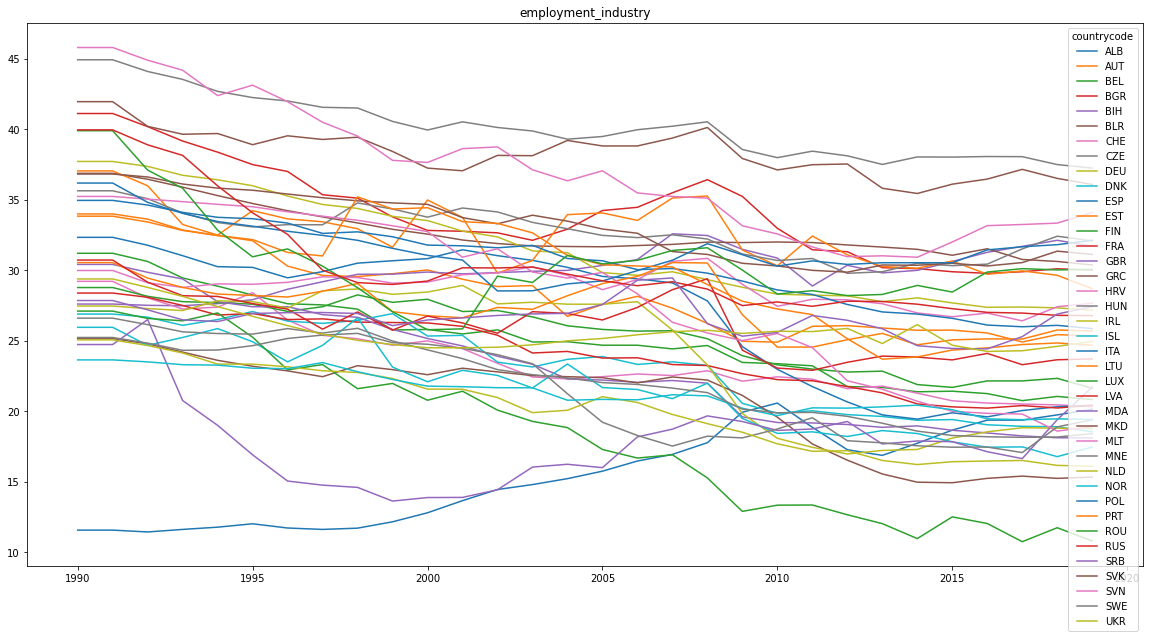

In [97]:
# Testing different imputation options for employment industry. As employment industry has missing values only in one year point,
# we are testing imputation methods removing one year (1991) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_ind = data[['year','employment_industry']].copy()

# Testing backfill option
data_copy.loc[data_copy.year == 1991, 'employment_industry'] = np.NaN
data_copy['employment_industry'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[data_copy.year == 1991].employment_industry, data_ind[data_ind.year == 1991].employment_industry)
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing KNN imputer
data_copy.loc[data_copy.year == 1991, 'employment_industry'] = np.NaN
data_copy.employment_industry = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 15])
mse = mean_squared_error(data_copy[data_copy.year == 1991].employment_industry, data_ind[data_ind.year == 1991].employment_industry)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Using backfill option as it has the best results
data['employment_industry'].fillna(method = 'backfill', inplace = True)

# Ploting employment industry after imputation
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_industry').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_industry')

### II.IV Employment_services - best imputation

MSE for fill NA with backfill option: 0.732
MSE for fill NA with KNN imputer: 51.541


<AxesSubplot:title={'center':'employment_services'}>

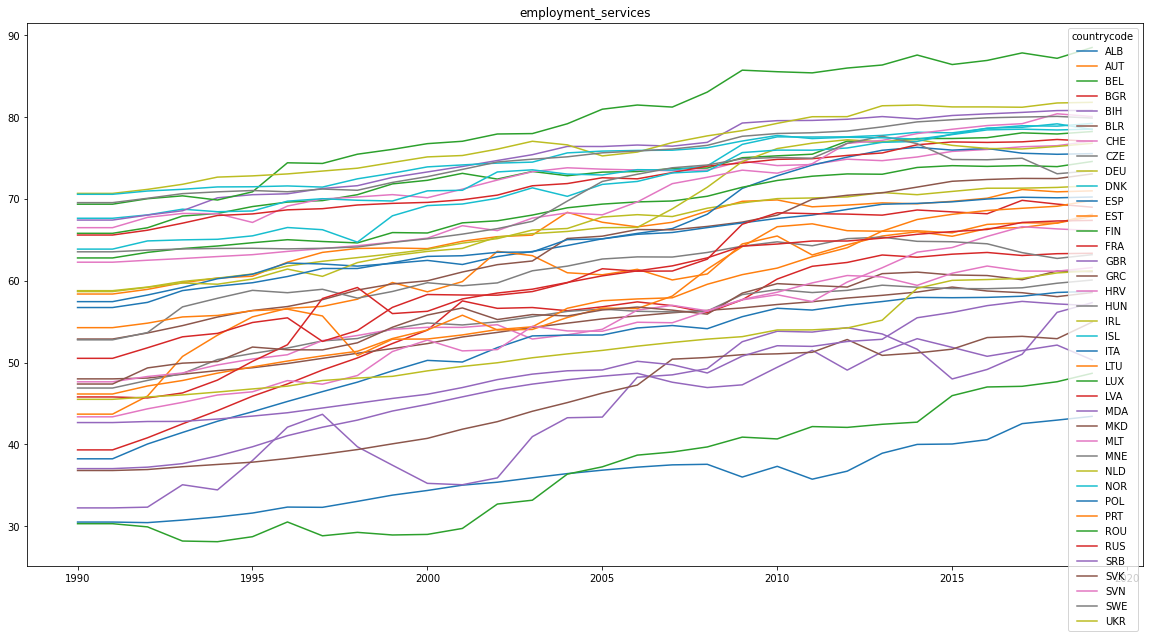

In [98]:
# Testing different imputation options for employment services. As employment services has missing values only in one year point,
# we are testing imputation methods removing one year (1991) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_serv = data[['year','employment_services']].copy()

# Testing backfill option
data_copy.loc[data_copy.year == 1991, 'employment_services'] = np.NaN
data_copy['employment_services'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[data_copy.year == 1991].employment_services, data_serv[data_serv.year == 1991].employment_services)
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing backfill option
data_copy.loc[data_copy.year == 1991, 'employment_services'] = np.NaN
data_copy.employment_services = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 16])
mse = mean_squared_error(data_copy[data_copy.year == 1991].employment_services, data_serv[data_serv.year == 1991].employment_services)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Using backfill option as it has the best results
data['employment_services'].fillna(method = 'backfill', inplace = True)

# Ploting employment industry after imputation
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='employment_services').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='employment_services')

### II.V Unemployment - best imputation

MSE for fill NA with backfill option: 2.050
MSE for fill NA with KNN imputer: 22.699


<AxesSubplot:title={'center':'unemployment'}>

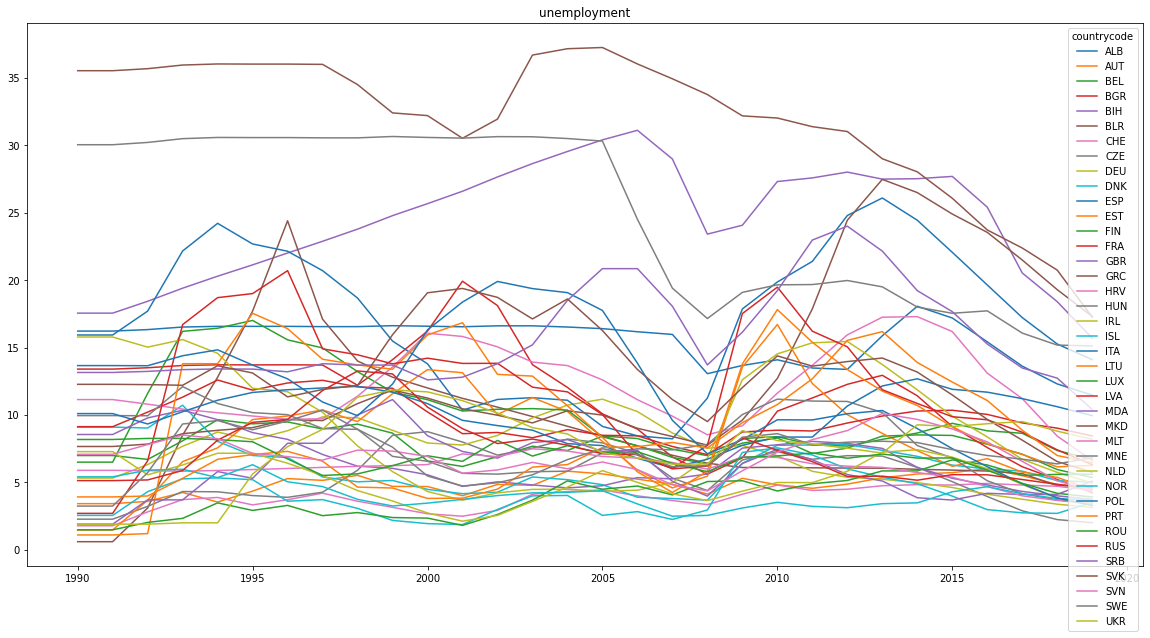

In [99]:
# Testing different imputation options for unemployment. As unemployment has missing values only in one year point,
# we are testing imputation methods removing one year (1991) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_uemp = data[['year','unemployment']].copy()

# Testing backfill option
data_copy.loc[data_copy.year == 1991, 'unemployment'] = np.NaN
data_copy['unemployment'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[data_copy.year == 1991].unemployment, data_uemp[data_uemp.year == 1991].unemployment)
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing KNN imputer option
data_copy.loc[data_copy.year == 1991, 'unemployment'] = np.NaN
data_copy.unemployment = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 24])
mse = mean_squared_error(data_copy[data_copy.year == 1991].unemployment, data_uemp[data_uemp.year == 1991].unemployment)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Using backfill option as it has the best results
data['unemployment'].fillna(method = 'backfill', inplace = True)

# Ploting unemployment after imputation
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='unemployment').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='unemployment')

### II.VI Export - best imputation

MSE for fill NA with backfill option: 78.454
MSE for fill NA with KNN imputer: 234.903
MSE for fill NA with spline method: 51.722


<AxesSubplot:title={'center':'export'}>

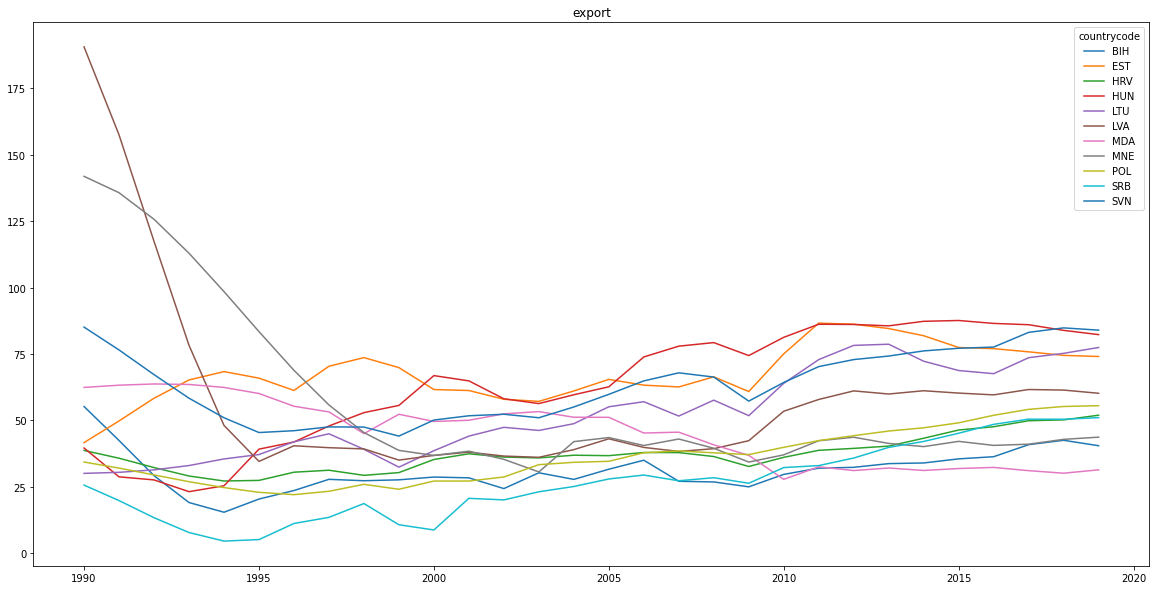

In [100]:
# Testing different imputation options for export. As export has missing values in 5 year period,
# we are testing imputation methods removing 5 years (2001 - 2005) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_exp = data[['year','export']].copy()

# Testing backfill option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'export'] = np.NaN
data_copy['export'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)].export, data_exp[(data_exp.year > 2000) & (data_exp.year < 2006)].export)
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing KNN imputer option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'export'] = np.NaN
data_copy.export = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 17])
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)].export, data_exp[(data_exp.year > 2000) & (data_exp.year < 2006)].export)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Testing spline option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'export'] = np.NaN
data_copy.export.interpolate(method = 'spline', order = 3, inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)].export, data_exp[(data_exp.year > 2000) & (data_exp.year < 2006)].export)
print("MSE for fill NA with spline method: {:.3f}".format(mse))

# Saving countries with missing values for ploting
data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test.export > 0].countrycode

# Using spline option as it has the best results
data.export.interpolate(method = 'spline', order = 3, inplace = True)

# Ploting export after imputation
data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='export').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='export')

### II.VII Import - best imputation

MSE for fill NA with backfill option: 91.607
MSE for fill NA with KNN imputer: 175.660
MSE for fill NA with polynomial option: 75.937


<AxesSubplot:title={'center':'import'}>

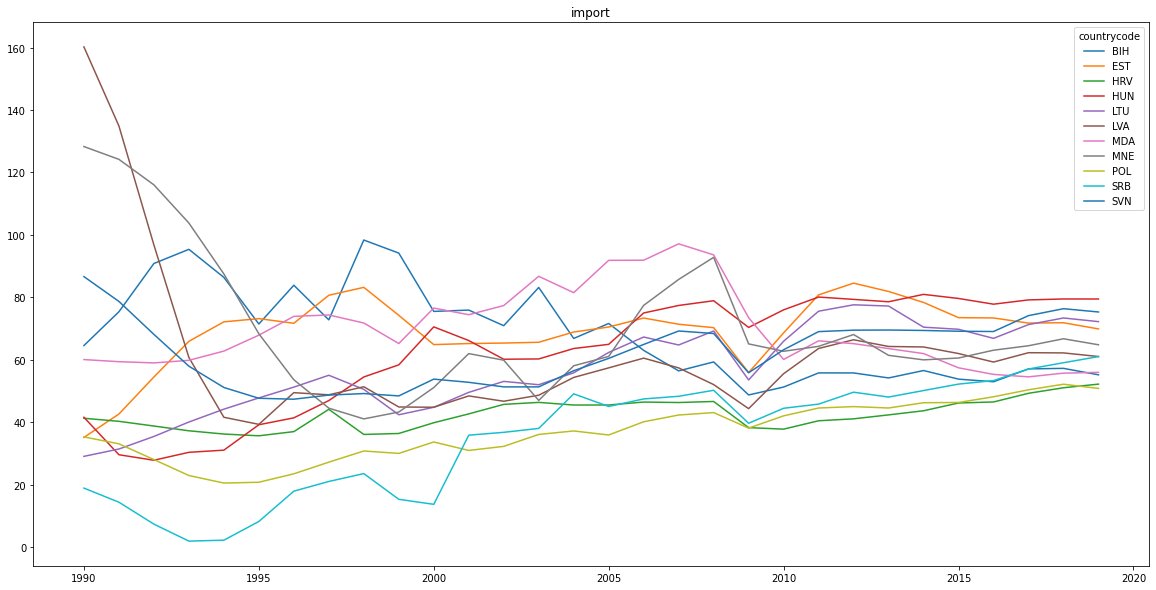

In [101]:
# Testing different imputation options for import. As import has missing values in 5 year period,
# we are testing imputation methods removing 5 years (2001 - 2005) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_imp = data[['year','import']].copy()

# Testing backfill option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'import'] = np.NaN
data_copy['import'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)]['import'], data_imp[(data_imp.year > 2000) & (data_imp.year < 2006)]['import'])
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing KNN imputer
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'import'] = np.NaN
data_copy['import'] = pd.Series(KNNImputer(n_neighbors=5).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 18])
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)]['import'], data_imp[(data_imp.year > 2000) & (data_imp.year < 2006)]['import'])
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Testing polynomial option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'import'] = np.NaN
data_copy['import'].interpolate(method = 'polynomial',order = 2, inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)]['import'], data_imp[(data_imp.year > 2000) & (data_imp.year < 2006)]['import'])
print("MSE for fill NA with polynomial option: {:.3f}".format(mse))

# Saving countries with missing values for ploting
data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['import'] > 0].countrycode

# Using polynomial option as it has the best results
data['import'].interpolate(method = 'polynomial',order = 2, inplace = True)

# Ploting import after imputation
data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='import').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='import')

### II.VIII Inflation - best imputation

MSE for fill NA with backfill option: 78.381
MSE for fill NA with KNN imputer: 9407.094
MSE for fill NA with spline option: 143.848


<AxesSubplot:title={'center':'inflation'}>

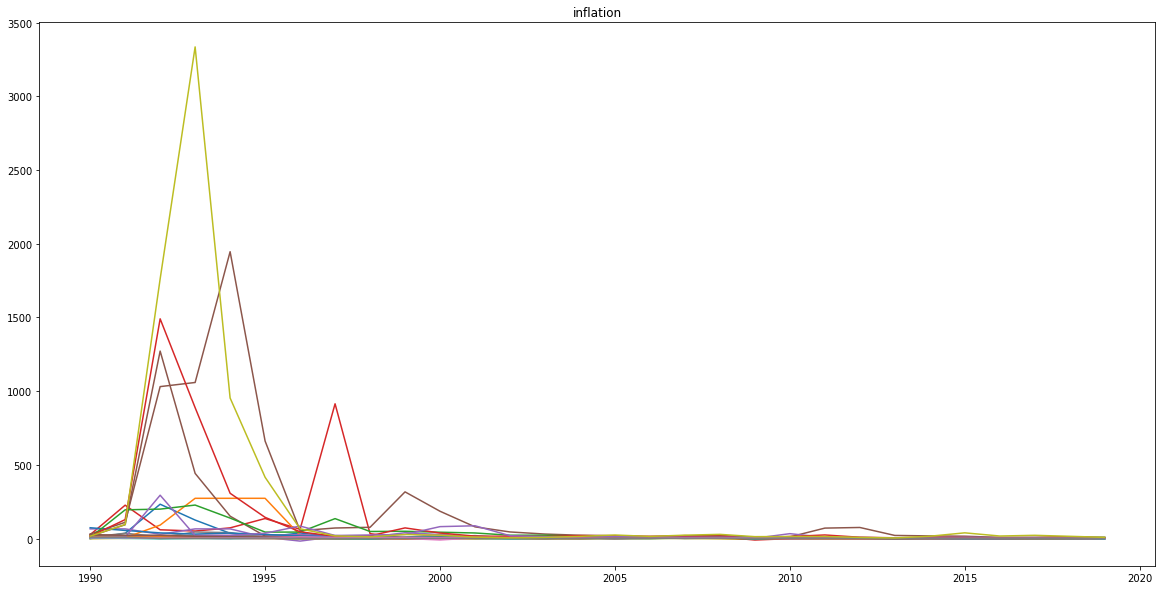

In [102]:
# Testing different imputation options for inflation. As inflation has missing values in 5 year period,
# we are testing imputation methods removing 5 years (2001 - 2005) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_inf = data[['year','inflation']].copy()

# Testing backfill option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'inflation'] = np.NaN
data_copy['inflation'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing KNN imputer
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'inflation'] = np.NaN
data_copy['inflation'] = pd.Series(KNNImputer(n_neighbors=7).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 19])
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Testing spline option
data_copy.loc[(data_copy.year > 2000) & (data_copy.year < 2006), 'inflation'] = np.NaN
data_copy['inflation'].interpolate(method = 'spline', order = 1, inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2000) & (data_copy.year < 2006)].inflation, data_inf[(data_inf.year > 2000) & (data_inf.year < 2006)].inflation)
print("MSE for fill NA with spline option: {:.3f}".format(mse))

# Saving countries with missing values for ploting 
data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['inflation'] > 0].countrycode

# In this case KNN Imputer is a better option due to unregular behaviour of inflation nearr 1991 year
data['inflation'] = pd.Series(KNNImputer(n_neighbors=7).fit_transform(data.drop(['countrycode', 'country'], axis = 1))[:, 19])

# Ploting inflation after imputation
data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data.pivot_table(index='countrycode', columns=['year'], values='inflation').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='inflation', legend = False)

### II.IX HDI - best imputation

MSE for fill NA with backfill option: 0.000
MSE for fill NA with KNN imputer: 0.001
MSE for fill NA with polynomial option: 0.000


<AxesSubplot:title={'center':'hdi'}>

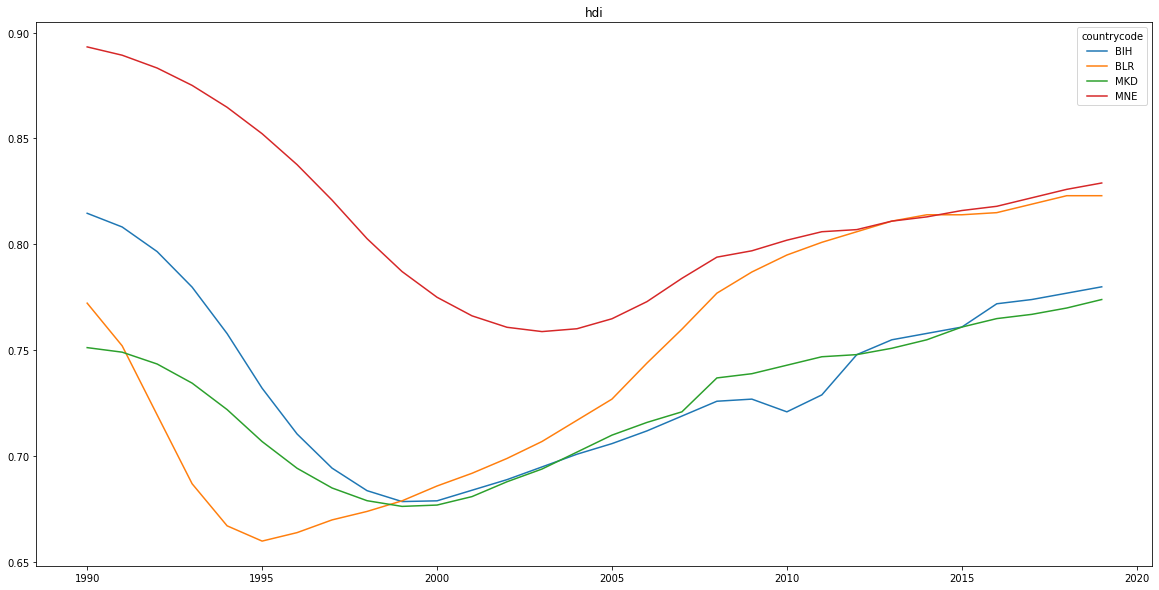

In [103]:
# Testing different imputation options for hdi. As hdi has missing values in 4 year period,
# we are testing imputation methods removing 4 years (2006 - 2009) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_hdi = data[['year','hdi']].copy()

# Testing backfill option
data_copy.loc[(data_copy.year > 2005) & (data_copy.year < 2010), 'hdi'] = np.NaN
data_copy['hdi'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2005) & (data_copy.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
print("MSE for fill NA with backfill option: {:.3f}".format(mse))

# Testing KNN imputer
data_copy.loc[(data_copy.year > 2005) & (data_copy.year < 2010), 'hdi'] = np.NaN
data_copy['hdi'] = pd.Series(KNNImputer(n_neighbors=8).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 26])
mse = mean_squared_error(data_copy[(data_copy.year > 2005) & (data_copy.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Testing polynomial option
data_copy.loc[(data_copy.year > 2005) & (data_copy.year < 2010), 'hdi'] = np.NaN
data_copy['hdi'].interpolate(method = 'polynomial', order = 2, inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year > 2005) & (data_copy.year < 2010)].hdi, data_hdi[(data_hdi.year > 2005) & (data_hdi.year < 2010)].hdi)
print("MSE for fill NA with polynomial option: {:.3f}".format(mse))

# Saving countries with missing values for ploting
data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['hdi'] > 0].countrycode

# Using polynomial option as it has the best results
data['hdi'].interpolate(method = 'polynomial', order = 2, inplace = True)

# Ploting hdi after imputation
data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='hdi').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='hdi')

### II.X Net migration - best imputation

MSE for fill NA with ffill option: 124854754745.833
MSE for fill NA with KNN imputer: 146102849382.288
MSE for fill NA with linear option: 124854754745.833


<AxesSubplot:title={'center':'net_migration'}>

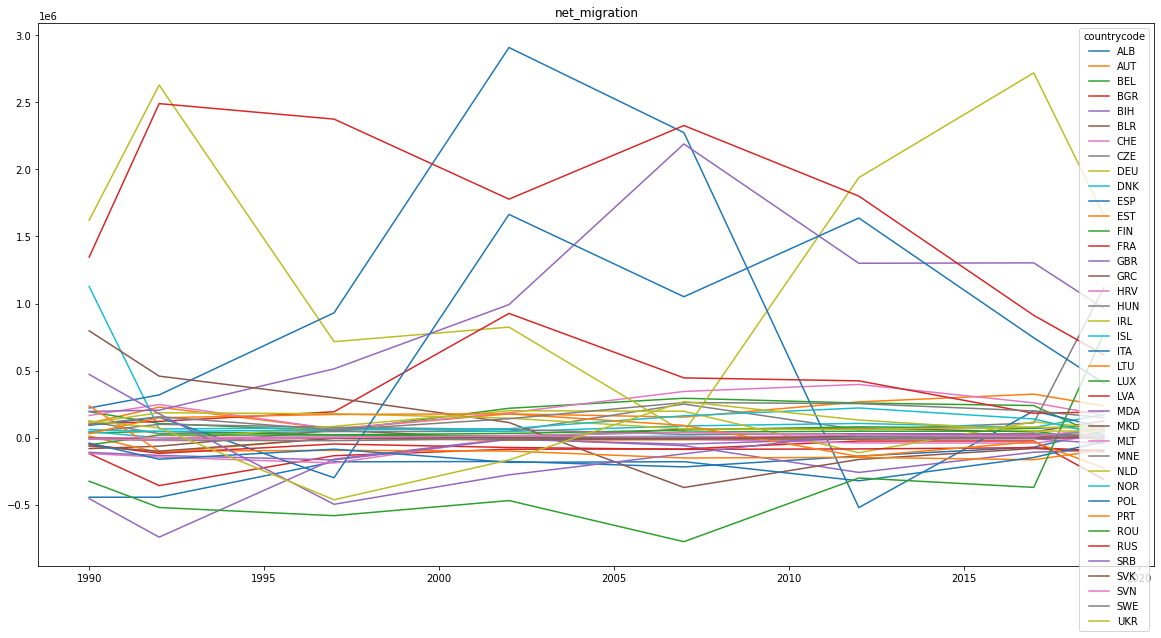

In [104]:
# Testing different imputation options for net migration. As net migration has values every 5 years,
# we are testing imputation methods removing two years (1997, 2007) and imputing it again.

# Coping data for tests
data_copy = data.copy()
data_net = data[['year','net_migration']].copy()

# Testing ffill option
data_copy.loc[(data_copy.year == 1997) | (data_copy.year == 2007), 'net_migration'] = np.NaN
data_copy['net_migration'].fillna(method = 'ffill', inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year == 1997) | (data_copy.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
print("MSE for fill NA with ffill option: {:.3f}".format(mse))

# Testing KNN imputer
data_copy.loc[(data_copy.year == 1997) | (data_copy.year == 2007), 'net_migration'] = np.NaN
data_copy['net_migration'] = pd.Series(KNNImputer(n_neighbors=10).fit_transform(data_copy.drop(['countrycode', 'country'], axis = 1))[:, 20])
mse = mean_squared_error(data_copy[(data_copy.year == 1997) | (data_copy.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
print("MSE for fill NA with KNN imputer: {:.3f}".format(mse))

# Testing linear option with backfill option for missing values in first and last years
data_copy.loc[(data_copy.year == 1997) | (data_copy.year == 2007), 'net_migration'] = np.NaN
data_copy['net_migration'].interpolate(method = 'linear', inplace = True)
data_copy['net_migration'].fillna(method = 'backfill', inplace = True)
mse = mean_squared_error(data_copy[(data_copy.year == 1997) | (data_copy.year == 2007)].net_migration, data_net[(data_net.year == 1997) | (data_net.year == 2007)].net_migration)
print("MSE for fill NA with linear option: {:.3f}".format(mse))

# Saving countries with missing values for ploting
data_test = data.drop('countrycode', axis=1).isna().groupby(data.countrycode, sort=False).sum().reset_index()
data_test = data_test[data_test['net_migration'] > 0].countrycode

# Using linear option as it has the best results
data['net_migration'].interpolate(method = 'linear', inplace = True)
data['net_migration'].fillna(method = 'backfill', inplace = True)

# Ploting net migration after imputation
data_test = data[(data.countrycode.isin(data_test))]
df_test_transposed = data_test.pivot_table(index='countrycode', columns=['year'], values='net_migration').reset_index()
df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')
df_test_final.T.plot(figsize=(20,10), title='net_migration')

In [105]:
# imputed data
data.to_csv('data/data_imputed.csv', index=False)

## III. Outlier detection

In [106]:
# Detecting outliers with 3 sigma method
df = pd.DataFrame()
for ind in data.columns[3:]:
    df_t = data[['year', ind]]
    for n in range(0,data.shape[0], 30):
        df_test = df_t.loc[n:n+29, :]
        l = np.array(df_test)
        std = np.std(l[:,1])
        mean=np.mean(l[:,1])
        for i in range (len(l[:,1])):
            if((l[i,1]<=mean+3*std)&(l[i,1]>=mean-3*std)):
                pass
            else:
                if (i!=len(l[:,1])-1)&(i!=0):
                    l[i,1]=(l[i-1,1]+l[i+1,1])/2
                    print('OUTLIER | ', ind, " | ", n+i)
                else:
                    print('OUTLIER | ', ind, " | ", n+i)
                    l[i,1]=mean
        if n==0: df_ind = pd.DataFrame(l, columns=['year', ind])
        else: df_ind = pd.concat([df_ind, pd.DataFrame(l, columns=['year', ind])])
    if df.shape[0] == 0: df = df_ind
    else: df = pd.concat([df, df_ind.drop('year', axis=1)], axis=1) 
data_out = pd.concat([data[['country', 'countrycode']], df.reset_index(drop=True)], axis=1)

OUTLIER |  delta  |  0
OUTLIER |  delta  |  569
OUTLIER |  xr  |  690
OUTLIER |  xr  |  691
OUTLIER |  csh_c  |  2
OUTLIER |  csh_c  |  120
OUTLIER |  csh_c  |  122
OUTLIER |  csh_i  |  180
OUTLIER |  csh_i  |  360
OUTLIER |  csh_i  |  569
OUTLIER |  csh_i  |  586
OUTLIER |  csh_i  |  722
OUTLIER |  csh_i  |  990
OUTLIER |  csh_i  |  1140
OUTLIER |  csh_g  |  90
OUTLIER |  csh_g  |  120
OUTLIER |  csh_g  |  122
OUTLIER |  csh_g  |  761
OUTLIER |  csh_g  |  1052
OUTLIER |  csh_x  |  721
OUTLIER |  csh_m  |  120
OUTLIER |  csh_m  |  122
OUTLIER |  csh_m  |  991
OUTLIER |  csh_r  |  2
OUTLIER |  csh_r  |  60
OUTLIER |  csh_r  |  92
OUTLIER |  csh_r  |  133
OUTLIER |  csh_r  |  153
OUTLIER |  csh_r  |  211
OUTLIER |  csh_r  |  240
OUTLIER |  csh_r  |  510
OUTLIER |  csh_r  |  631
OUTLIER |  csh_r  |  690
OUTLIER |  csh_r  |  722
OUTLIER |  csh_r  |  752
OUTLIER |  emp_percent  |  120
OUTLIER |  emp_percent  |  1080
OUTLIER |  emp_percent  |  1110
OUTLIER |  co2_emission  |  90
OUTLIER |  c

## IV. Normalization

In [107]:
# Normalizing data
normalizer = MinMaxScaler()
data_norm = normalizer.fit_transform(data.drop(['countrycode', 'country', 'year'], axis=1))
data_norm = pd.DataFrame(data_norm, columns = data.columns[3:])
data = pd.concat([data[['countrycode', 'country', 'year']], data_norm], axis=1)

In [108]:
normalizer = MinMaxScaler()
data_out_norm = normalizer.fit_transform(data_out.drop(['countrycode', 'country', 'year'], axis=1))
data_out_norm = pd.DataFrame(data_out_norm, columns = data.columns[3:])
data_out_norm = pd.concat([data[['countrycode', 'country', 'year']], data_out_norm], axis=1)
data_out_norm.to_csv('data/data_out.csv', index=False)

## V. Transformations

In [109]:
# log transformation
def log_transformation(x: pd.Series) -> pd.Series:
    return np.log1p(x)

# Box-cox transformation
def box_cox_transformation(x: pd.Series) -> Tuple[np.array, float]:
    x_transformed, lambda_value = stats.boxcox(x)
    return x_transformed, lambda_value

In [110]:
# Saving data transformed with log
data_log = pd.concat([data[['country', 'countrycode', 'year']], data.drop(['year'], axis=1).groupby(
    ['country', 'countrycode']).apply(lambda x: log_transformation(x))], axis=1)

data_log.to_csv('data/data_log.csv', header=True, index=False)

In [111]:
# Saving data transformed with box cox
box_cox_data = pd.DataFrame(columns = data.columns)

for col in data.columns[3:]:
    box_cox_transformed_data, lambda_value = box_cox_transformation(data[col] + 1)
    box_cox_data[col] = box_cox_transformed_data

box_cox_data[data.columns[:3]] = data[data.columns[:3]]
box_cox_data.to_csv('data/data_box.csv', index=False, header=True)

## VI. Smoothing

In [112]:
# Smoothing data
for ind in data.columns[3:]:
    df_test = data[['countrycode','year', ind]]

    # transposing
    df_test_transposed = df_test.pivot_table(index='countrycode', columns=['year'], values=ind).reset_index()
    df_test_final = df_test_transposed.rename_axis('').rename_axis("", axis="columns").set_index('countrycode')

    fd = skfda.FDataGrid(
        data_matrix=df_test_final.loc[:, df_test_final.columns != 'country']
    )

    smoother = skfda.preprocessing.smoothing.kernel_smoothers.NadarayaWatsonSmoother()
    fd_smooth = smoother.fit_transform(fd)    

    data_smooth = pd.DataFrame(fd_smooth.data_matrix.reshape(fd_smooth.data_matrix.shape[0], fd_smooth.data_matrix.shape[1]))
    data_smooth.columns = set(data['year'])

    temp = pd.DataFrame(set(data['countrycode']))
    temp.columns = ['countrycode']
    temp = temp.sort_values('countrycode').reset_index().countrycode
    data_smooth['countrycode'] = temp

    data[ind] = pd.melt(data_smooth, id_vars = 'countrycode').sort_values(['countrycode', 'variable']).reset_index(drop = True).value



In [113]:
# saving preprocessed data
data.to_csv('data/data.csv', index=False)